In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
d1 = pd.read_csv('../Train_details_22122017.csv')

In [68]:
d1

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
0,107,SWV-MAO-VLNK,1,SWV,SAWANTWADI R,0.00.00,10.25.00,0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
1,107,SWV-MAO-VLNK,2,THVM,THIVIM,11.06.00,11.08.00,32,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
2,107,SWV-MAO-VLNK,3,KRMI,KARMALI,11.28.00,11.30.00,49,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
3,107,SWV-MAO-VLNK,4,MAO,MADGOAN JN.,12.10.00,0.00.00,78,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
4,108,VLNK-MAO-SWV,1,MAO,MADGOAN JN.,0.00.00,20.30.00,0,MAO,MADGOAN JN.,SWV,SAWANTWADI ROAD
...,...,...,...,...,...,...,...,...,...,...,...,...
186114,99908,EMU,8,AKRD,AKURDI,23.30.00,23.31.00,19,PUNE,PUNE JN.,TGN,TALEGAON
186115,99908,EMU,9,DEHR,DEHU ROAD,23.35.00,23.36.00,24,PUNE,PUNE JN.,TGN,TALEGAON
186116,99908,EMU,10,BGWI,BEGDAEWAI,23.39.00,23.40.00,28,PUNE,PUNE JN.,TGN,TALEGAON
186117,99908,EMU,11,GRWD,GHORAWADI,23.41.00,23.42.00,31,PUNE,PUNE JN.,TGN,TALEGAON


In [3]:
def get_ddist(g):
    l = len(g)
    d = dict()
    for i in range(0,l):
        if g[i] in d.keys():
            d[g[i]] = d[g[i]] + 1
        else:
            d[g[i]] = 1
    return d

In [4]:
def getTime(t1):
    if len(t1) == 8:
        time = (int(t1[0]) * 10 + int(t1[1])) * 3600 + (int(t1[3]) * 10 + int(t1[4])) * 60 + int(t1[6] * 10) + int(t1[7])
    if len(t1) == 7:
        time = (int(t1[0])) * 3600 + (int(t1[2]) * 10 + int(t1[3])) * 60 + int(t1[5] * 10) + int(t1[6])
    return time
i = 0
G = nx.MultiGraph()
for i in range(0,len(d1['Train No'])):
    if i < len(d1['Train No']) - 1:
        if d1['SEQ'][i+1] != 1:
            t_no = d1['Train No'][i]
            if type(d1['Arrival time'][i+1]) != float and type(d1['Departure Time'][i]) != float: 
                time = getTime(d1['Arrival time'][i+1]) - getTime(d1['Departure Time'][i])
            if type(d1['Distance'][i+1]) != float and type(d1['Distance'][i]) != float:
                distance = int(d1['Distance'][i+1]) - int(d1['Distance'][i])
            e_weights = [t_no,time,distance]
            G.add_edge(d1['Station Code'][i],d1['Station Code'][i+1],weights = e_weights)

In [5]:
degree1 = dict(G.degree)
for d in degree1.keys():
    if degree1[d] == max(degree1.values()):
        print(d)
        print("Maximum degree = " + str(max(degree1.values())))

TNA
Maximum degree = 1212


In [6]:
i = 1
for h in nx.connected_components(G):
    k = nx.subgraph(G,h)
    print("No of nodes in " + str(i) + "th subgraph are " + str(len(k.nodes)))
    degree1 = dict(k.degree)
    count1 = 0
    count2 = 0
    ap = list(nx.articulation_points(k))
    for d in degree1.keys():
        if degree1[d] == 1:
            count1 = count1 + 1
        if degree1[d] == 2:
            count2 = count2 + 1
    print("For " + str(i) + "th subgraph, nodes with  = " + str(count1) + " count2 = " + str(count2))
    print("No of AP = " + str(len(ap)))

No of nodes in 1th subgraph are 8060
For 1th subgraph, count1 = 2 count2 = 79
No of AP = 804
No of nodes in 1th subgraph are 29
For 1th subgraph, count1 = 0 count2 = 0
No of AP = 17
No of nodes in 1th subgraph are 12
For 1th subgraph, count1 = 0 count2 = 1
No of AP = 9
No of nodes in 1th subgraph are 10
For 1th subgraph, count1 = 0 count2 = 0
No of AP = 7
No of nodes in 1th subgraph are 17
For 1th subgraph, count1 = 0 count2 = 0
No of AP = 15
No of nodes in 1th subgraph are 17
For 1th subgraph, count1 = 0 count2 = 0
No of AP = 7
No of nodes in 1th subgraph are 3
For 1th subgraph, count1 = 0 count2 = 0
No of AP = 1


Text(0, 0.5, 'No of nodes')

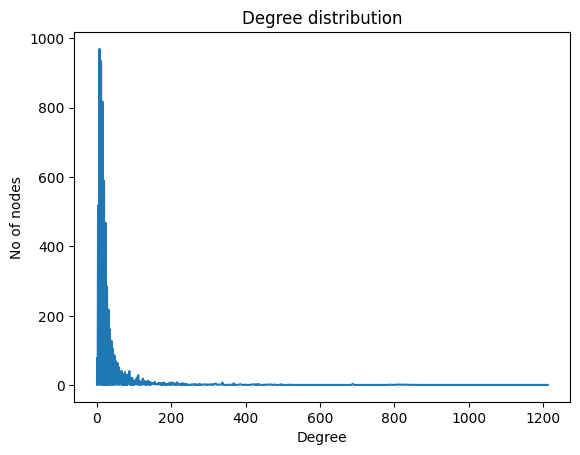

In [7]:
h = list(nx.connected_components(G))
G1 = nx.subgraph(G,h[0])
dict1 = dict(G1.degree())
dd = get_ddist(list(dict1.values()))
dds = dict(sorted(dd.items()))
plt.plot(dds.keys(),dds.values())
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('No of nodes')

In [8]:
ap = list(nx.articulation_points(G1))
print(len(ap))

804


In [38]:
count = 0
c7 = 0
nap = np.empty((len(ap),3),dtype='S5')
for a in ap:
    G2 = nx.MultiGraph(G1)
    G2.remove_node(a)
    h1 = list(nx.connected_components(G2))
    G21 = nx.subgraph(G2,h1[0])
    G22 = nx.subgraph(G2,h1[1])
    n1 = len(list(G21.nodes))
    n2 = len(list(G22.nodes))
    nap[count,0] = a
    nap[count,1] = str(n1)
    nap[count,2] = str(n2)
    count = count + 1
    
    if abs(n1 - n2) < 7000:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2)) 
        c7 = c7 + 1
    if abs(n1 - n2) < 7500 and count > 100 and c7 < 10:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2))
    if abs(n1 - n2) < 8000 and count > 200 and c7 < 10:
        print("Articulation point: " + str(a))
        print("The graph is split into " + str(n1) + " " + str(n2))

Articulation point: MXN
The graph is split into 8006 53
Articulation point: DMV
The graph is split into 7980 79
Articulation point: DPU
The graph is split into 7975 84
Articulation point: LMG
The graph is split into 7971 88
Articulation point: GHY
The graph is split into 7837 222
Articulation point: RPAN
The graph is split into 8013 43
Articulation point: RNY
The graph is split into 7999 60
Articulation point: MALA
The graph is split into 8029 30
Articulation point: PBE
The graph is split into 8010 32
Articulation point: SSC
The graph is split into 8008 51
Articulation point: BJV
The graph is split into 8007 52
Articulation point: STH
The graph is split into 8006 53
Articulation point: BPR
The graph is split into 8004 55
Articulation point: RHA
The graph is split into 8026 33
Articulation point: BLN
The graph is split into 8009 50
Articulation point: NUPR
The graph is split into 8029 30
Articulation point: DLSR
The graph is split into 8027 32
Articulation point: PTK
The graph is split 

In [11]:
len(ap)

804

In [12]:
a

'PNQ'

In [13]:
ap[0]

'PNQ'

In [16]:
abs(-8)

8

In [32]:
n = np.empty((2,2),dtype = 'S3')

In [33]:
n[0,0] = 1

In [29]:
n

array([[ 1.  , -4.  ],
       [80.25, 14.  ]])

In [34]:
n[1,0] = 2
n

array([[b'1', b''],
       [b'2', b'']], dtype='|S3')

In [36]:
n[1,1] = 'HEL'
n

array([[b'1', b''],
       [b'2', b'HEL']], dtype='|S3')

In [39]:
len(nap)

804

In [40]:
nap

array([[b'PNQ', b'805', b'1'],
       [b'LOV', b'805', b'1'],
       [b'KXT', b'805', b'2'],
       ...,
       [b'CQA', b'805', b'7'],
       [b'VPZ', b'805', b'9'],
       [b'SRR', b'804', b'11']], dtype='|S3')

In [41]:
hnap = nap[:,1]

In [42]:
hnap

array([b'805', b'805', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'805', b'805', b'805', b'805', b'805', b'800', b'805',
       b'804', b'804', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'805', b'804', b'804', b'804', b'804', b'804', b'802',
       b'805', b'804', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'804', b'804', b'804', b'804', b'804', b'804', b'802',
       b'802', b'802', b'795', b'805', b'804', b'805', b'805', b'805',
       b'805', b'803', b'805', b'804', b'804', b'804', b'804', b'804',
       b'804', b'804', b'803', b'803', b'803', b'803', b'803', b'803',
       b'805', b'805', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'805', b'805', b'805', b'805', b'805', b'805', b'805',
       b'804', b'804', b'804', b'804', b'805', b'805', b'805', b'805',
       b'804', b'805', b'805', b'805', b'805', b'805', b'805', b'805',
       b'805', b'805', b'804', b'805', b'805', b'805', b'804', b'804',
      

In [43]:
min(hnap)

b'783'

In [44]:
lnap = nap[:,2]

In [45]:
max(lnap)

b'9'

In [46]:
lnap

array([b'1', b'1', b'2', b'3', b'4', b'5', b'6', b'1', b'2', b'3', b'4',
       b'5', b'1', b'1', b'10', b'4', b'11', b'2', b'1', b'2', b'3', b'4',
       b'5', b'6', b'1', b'2', b'10', b'15', b'16', b'17', b'18', b'19',
       b'1', b'2', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'11', b'12',
       b'13', b'14', b'15', b'16', b'37', b'38', b'39', b'105', b'5',
       b'10', b'1', b'2', b'3', b'4', b'1', b'5', b'10', b'11', b'12',
       b'14', b'15', b'18', b'19', b'20', b'23', b'24', b'25', b'26',
       b'27', b'1', b'2', b'2', b'3', b'4', b'5', b'6', b'1', b'2', b'3',
       b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'11', b'12', b'13',
       b'3', b'7', b'1', b'7', b'1', b'1', b'2', b'3', b'4', b'5', b'6',
       b'7', b'8', b'9', b'10', b'1', b'4', b'8', b'11', b'15', b'23',
       b'28', b'4', b'5', b'6', b'8', b'10', b'1', b'2', b'3', b'1', b'2',
       b'3', b'4', b'5', b'6', b'7', b'8', b'1', b'2', b'3', b'4', b'5',
       b'6', b'7', b'8', b'9', b'10', b'11', b'12', b'13

In [52]:
knap = np.empty(len(lnap))
ic = 0
for i in lnap:
    knap[ic] = int(i)
    ic = ic + 1

In [50]:
int(lnap[10])

4

In [53]:
max(knap)

222.0

In [54]:
nap

array([[b'PNQ', b'805', b'1'],
       [b'LOV', b'805', b'1'],
       [b'KXT', b'805', b'2'],
       ...,
       [b'CQA', b'805', b'7'],
       [b'VPZ', b'805', b'9'],
       [b'SRR', b'804', b'11']], dtype='|S3')

In [59]:
apdict = dict()
ni = 0
for ni in range(len(nap)):
    k = int(nap[ni,2])
    if k in apdict.keys():
        apdict[k] = apdict[k] + 1
    else:
        apdict[k] = 1

In [60]:
apdict

{1: 118,
 2: 98,
 3: 76,
 4: 66,
 5: 61,
 6: 54,
 10: 32,
 11: 25,
 15: 16,
 16: 12,
 17: 8,
 18: 7,
 19: 9,
 7: 48,
 12: 23,
 13: 17,
 14: 14,
 37: 1,
 38: 1,
 39: 2,
 105: 1,
 20: 4,
 23: 8,
 24: 3,
 25: 3,
 26: 3,
 27: 1,
 8: 34,
 9: 30,
 28: 2,
 53: 2,
 79: 1,
 84: 1,
 88: 1,
 21: 4,
 222: 1,
 43: 1,
 60: 1,
 22: 4,
 30: 2,
 32: 2,
 51: 1,
 52: 1,
 55: 1,
 33: 2,
 50: 1,
 29: 1}

In [61]:
dap = dict(sorted(apdict.items()))

In [62]:
dap

{1: 118,
 2: 98,
 3: 76,
 4: 66,
 5: 61,
 6: 54,
 7: 48,
 8: 34,
 9: 30,
 10: 32,
 11: 25,
 12: 23,
 13: 17,
 14: 14,
 15: 16,
 16: 12,
 17: 8,
 18: 7,
 19: 9,
 20: 4,
 21: 4,
 22: 4,
 23: 8,
 24: 3,
 25: 3,
 26: 3,
 27: 1,
 28: 2,
 29: 1,
 30: 2,
 32: 2,
 33: 2,
 37: 1,
 38: 1,
 39: 2,
 43: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 2,
 55: 1,
 60: 1,
 79: 1,
 84: 1,
 88: 1,
 105: 1,
 222: 1}

Text(0, 0.5, 'No of Articulation points')

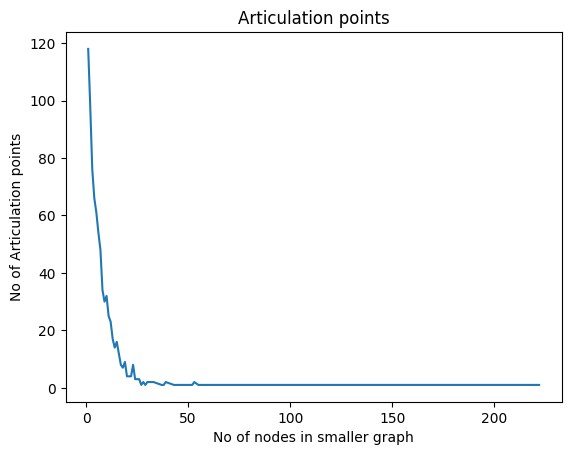

In [67]:
plt.plot(dap.keys(),dap.values())
plt.title('Articulation points')
plt.xlabel('No of nodes in smaller graph')
plt.ylabel('No of Articulation points')

In [65]:
for i in range(len(nap)):
    if nap[i,2] == b'222':
        print(nap[i,0])

b'GHY'


In [66]:
sum(dap.values())

804